# Ejercicio 5

Librerías

In [1]:
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, closing, disk, opening, erosion
from skimage.measure import label, regionprops
from skimage import io

import matplotlib.pyplot as plt

Imagen

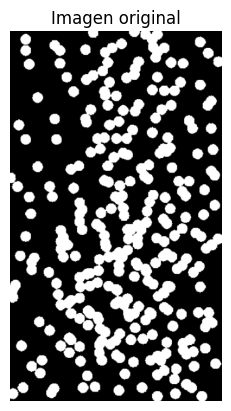

In [2]:
image = io.imread("microscope.png", as_gray=True)

def showImage(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

showImage(image, "Imagen original")

Inciso 1: Binarizar la imagen utilizando el umbral de Otsu


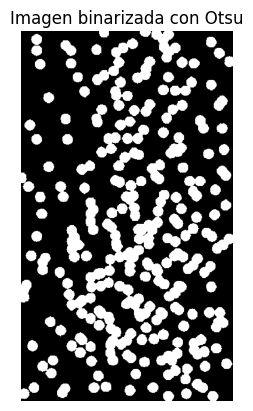

In [3]:
otsuThreshold = threshold_otsu(image)
binaryImage = image > otsuThreshold
showImage(binaryImage, "Imagen binarizada con Otsu")

Inciso 2: Etiquetar componentes conexas y obtener la menor

In [4]:
labeledImage = label(binaryImage, connectivity=2)
regions = regionprops(labeledImage)
minRegion = min(regions, key=lambda r: r.area)
print("La componente conexa con menor tamaño tiene: ", minRegion.area, "pixeles")

La componente conexa con menor tamaño tiene:  158.0 pixeles


Inciso 3: Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde sólo quede la mayor componente conexa

La componente conexa con mayor tamaño tiene:  4180.0 pixeles


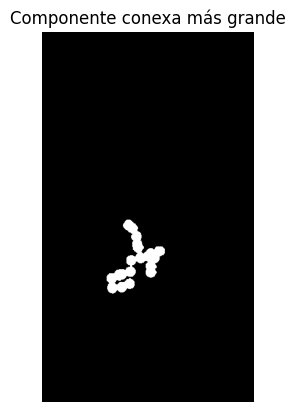

In [5]:
maxRegion = max(regions, key=lambda r: r.area)
print("La componente conexa con mayor tamaño tiene: ", maxRegion.area, "pixeles")
maxRegionSize = maxRegion.area
maxComponentImage = labeledImage == maxRegion.label
showImage(maxComponentImage, "Componente conexa más grande")

Inciso 4: Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el número verdadero de células? ¿Son iguales?

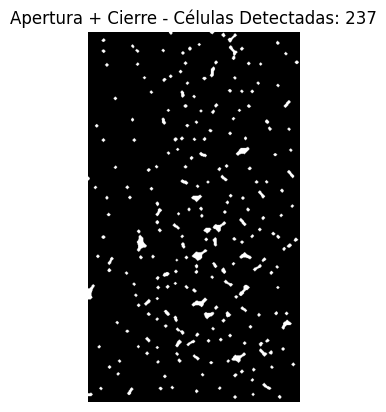

In [6]:
eroded_image = erosion(binaryImage, disk(6.5))
opened_image = opening(eroded_image, disk(2))
closed_image = closing(opened_image, disk(2))
num_cells_opening = len(regionprops(label(closed_image)))
showImage(closed_image, f'Apertura + Cierre - Células Detectadas: {num_cells_opening}')
